# TP2 - Realidade Aumentada

Aluno: Vinicius Silva Gomes

Matrícula: 2021421869

In [1]:
# Importing libraries

import numpy as np
import cv2
import os

import matplotlib.pyplot as plt

from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

from PIL import Image

from objloader import *

pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Extraindo frames do vídeo para calibração

Esse pequeno script foi feito para extrair os frames do vídeo e usá-los para calibrar a câmera e obter os parâmetros intrínsecos da câmera. O script, em suma, carrega o vídeo, usando o OpenCV, e salva cada frame no disco, em uma pasta chamada ./fames.

Dessa pasta, foram escolhidos 6 frames que apresentavam angulações, distâncias e rotações diferentes do tabuleiro xadrez e esses frames foram separados para serem usados na calibração da câmera.

OBS: Para que as imagens sejam salvas, a pasta ./frames precisa ter sido criada previamente.

In [4]:
# Extract frames from the video

cam = cv2.VideoCapture("./entrada.mp4")

current_frame = 0

while(True):
    ret, frame = cam.read()

    if ret:
        # A ./frames/ folder must exist for this code to work
        name = './frames/frame' + str(current_frame) + '.jpg'
        print ('Creating... ' + name)
  
        cv2.imwrite(name, frame)
  
        current_frame += 1
    else:
        break

cam.release()
cv2.destroyAllWindows()

Creating... ./frames/frame0.jpg
Creating... ./frames/frame1.jpg
Creating... ./frames/frame2.jpg
Creating... ./frames/frame3.jpg
Creating... ./frames/frame4.jpg
Creating... ./frames/frame5.jpg
Creating... ./frames/frame6.jpg
Creating... ./frames/frame7.jpg
Creating... ./frames/frame8.jpg
Creating... ./frames/frame9.jpg
Creating... ./frames/frame10.jpg
Creating... ./frames/frame11.jpg
Creating... ./frames/frame12.jpg
Creating... ./frames/frame13.jpg
Creating... ./frames/frame14.jpg
Creating... ./frames/frame15.jpg
Creating... ./frames/frame16.jpg
Creating... ./frames/frame17.jpg
Creating... ./frames/frame18.jpg
Creating... ./frames/frame19.jpg
Creating... ./frames/frame20.jpg
Creating... ./frames/frame21.jpg
Creating... ./frames/frame22.jpg
Creating... ./frames/frame23.jpg
Creating... ./frames/frame24.jpg
Creating... ./frames/frame25.jpg
Creating... ./frames/frame26.jpg
Creating... ./frames/frame27.jpg
Creating... ./frames/frame28.jpg
Creating... ./frames/frame29.jpg
Creating... ./frames

Creating... ./frames/frame246.jpg
Creating... ./frames/frame247.jpg
Creating... ./frames/frame248.jpg
Creating... ./frames/frame249.jpg
Creating... ./frames/frame250.jpg
Creating... ./frames/frame251.jpg
Creating... ./frames/frame252.jpg
Creating... ./frames/frame253.jpg
Creating... ./frames/frame254.jpg
Creating... ./frames/frame255.jpg
Creating... ./frames/frame256.jpg
Creating... ./frames/frame257.jpg
Creating... ./frames/frame258.jpg
Creating... ./frames/frame259.jpg
Creating... ./frames/frame260.jpg
Creating... ./frames/frame261.jpg
Creating... ./frames/frame262.jpg
Creating... ./frames/frame263.jpg
Creating... ./frames/frame264.jpg
Creating... ./frames/frame265.jpg
Creating... ./frames/frame266.jpg
Creating... ./frames/frame267.jpg
Creating... ./frames/frame268.jpg
Creating... ./frames/frame269.jpg
Creating... ./frames/frame270.jpg
Creating... ./frames/frame271.jpg
Creating... ./frames/frame272.jpg
Creating... ./frames/frame273.jpg
Creating... ./frames/frame274.jpg
Creating... ./

Creating... ./frames/frame503.jpg
Creating... ./frames/frame504.jpg
Creating... ./frames/frame505.jpg
Creating... ./frames/frame506.jpg
Creating... ./frames/frame507.jpg
Creating... ./frames/frame508.jpg
Creating... ./frames/frame509.jpg
Creating... ./frames/frame510.jpg
Creating... ./frames/frame511.jpg
Creating... ./frames/frame512.jpg
Creating... ./frames/frame513.jpg
Creating... ./frames/frame514.jpg
Creating... ./frames/frame515.jpg
Creating... ./frames/frame516.jpg
Creating... ./frames/frame517.jpg
Creating... ./frames/frame518.jpg
Creating... ./frames/frame519.jpg
Creating... ./frames/frame520.jpg
Creating... ./frames/frame521.jpg
Creating... ./frames/frame522.jpg
Creating... ./frames/frame523.jpg
Creating... ./frames/frame524.jpg
Creating... ./frames/frame525.jpg
Creating... ./frames/frame526.jpg
Creating... ./frames/frame527.jpg
Creating... ./frames/frame528.jpg
Creating... ./frames/frame529.jpg
Creating... ./frames/frame530.jpg
Creating... ./frames/frame531.jpg
Creating... ./

Creating... ./frames/frame758.jpg
Creating... ./frames/frame759.jpg
Creating... ./frames/frame760.jpg
Creating... ./frames/frame761.jpg
Creating... ./frames/frame762.jpg
Creating... ./frames/frame763.jpg
Creating... ./frames/frame764.jpg
Creating... ./frames/frame765.jpg
Creating... ./frames/frame766.jpg
Creating... ./frames/frame767.jpg
Creating... ./frames/frame768.jpg
Creating... ./frames/frame769.jpg
Creating... ./frames/frame770.jpg
Creating... ./frames/frame771.jpg
Creating... ./frames/frame772.jpg
Creating... ./frames/frame773.jpg
Creating... ./frames/frame774.jpg
Creating... ./frames/frame775.jpg
Creating... ./frames/frame776.jpg
Creating... ./frames/frame777.jpg
Creating... ./frames/frame778.jpg
Creating... ./frames/frame779.jpg
Creating... ./frames/frame780.jpg
Creating... ./frames/frame781.jpg
Creating... ./frames/frame782.jpg
Creating... ./frames/frame783.jpg
Creating... ./frames/frame784.jpg
Creating... ./frames/frame785.jpg
Creating... ./frames/frame786.jpg
Creating... ./

Creating... ./frames/frame1042.jpg
Creating... ./frames/frame1043.jpg
Creating... ./frames/frame1044.jpg
Creating... ./frames/frame1045.jpg
Creating... ./frames/frame1046.jpg
Creating... ./frames/frame1047.jpg
Creating... ./frames/frame1048.jpg
Creating... ./frames/frame1049.jpg
Creating... ./frames/frame1050.jpg
Creating... ./frames/frame1051.jpg
Creating... ./frames/frame1052.jpg
Creating... ./frames/frame1053.jpg
Creating... ./frames/frame1054.jpg
Creating... ./frames/frame1055.jpg
Creating... ./frames/frame1056.jpg
Creating... ./frames/frame1057.jpg
Creating... ./frames/frame1058.jpg
Creating... ./frames/frame1059.jpg
Creating... ./frames/frame1060.jpg
Creating... ./frames/frame1061.jpg
Creating... ./frames/frame1062.jpg
Creating... ./frames/frame1063.jpg
Creating... ./frames/frame1064.jpg
Creating... ./frames/frame1065.jpg
Creating... ./frames/frame1066.jpg
Creating... ./frames/frame1067.jpg
Creating... ./frames/frame1068.jpg
Creating... ./frames/frame1069.jpg
Creating... ./frames

## Obtendo os parâmetros intrínsecos

Com os frames selecionados, foi usado o MatLAB para obter os parâmetros intrísecos da câmera. A opção "Camera Calibration" foi a escolhida. Os pontos do tabuleiro foram selecionados e após o mapeamento e as devidas funções internas do MatLAB terem sido executadas, a matriz de parâmetros intrínsecos foi obtida.

A próxima célula apresenta a declaração dessa matriz com os dados de output do MatLAB.

<!-- OBS: A matriz foi transposta para se parecer com a matriz que foi estudada e usada como exemplo ao longo das aulas da disciplina. -->

In [2]:
intrinsic_params = np.array(([412.529325914068, 0, 315.182970634010],
                     [0, 409.199483018995, 225.068598819594],
                     [0, 0, 1]))

print(intrinsic_params)

[[412.52932591   0.         315.18297063]
 [  0.         409.19948302 225.06859882]
 [  0.           0.           1.        ]]


## Localizando os alvos ao longo do vídeo

In [3]:
# Funções auxiliares

def calculate_rmse(changed, original):
    return np.sqrt(((changed - original) **2).mean())

def comparison_target(thresh, target, copy):
    template = cv2.imread("./alvo.jpg", 0)
    
    template_points = np.array([[0, 0],
                            [template.shape[0], 0],
                            [template.shape[0], template.shape[1]],
                            [0, template.shape[1]]])
    
    homography, _ = cv2.findHomography(target, template_points, cv2.RANSAC, 5.0)
    rectified = cv2.warpPerspective(thresh, homography, (template.shape[0], template.shape[1]))
    
    left = cv2.rotate(template.copy(), cv2.ROTATE_90_COUNTERCLOCKWISE)
    up = template.copy()
    right = cv2.rotate(template.copy(), cv2.ROTATE_90_CLOCKWISE)
    down = cv2.rotate(template.copy(), cv2.ROTATE_180)
    
    err_up = calculate_rmse(rectified, up)
    err_right = calculate_rmse(rectified, right)    
    err_down = calculate_rmse(rectified, down)
    err_left = calculate_rmse(rectified, left)
    
    errors = [err_up, err_right, err_down, err_left]
    
    min_error = min(errors)
    min_index = errors.index(min_error)
    
    if min_error < 5:
        return True
    else:
        return False
    
def identify_targets(frame):
    copy = frame.copy()
    gray_frame = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)
        
    edged = cv2.Canny(thresh, 100, 200)
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
    targets = []
        
    for contour in contours:
        hull = cv2.convexHull(contour)
            
        perimeter = cv2.arcLength(hull, True)
        approx = cv2.approxPolyDP(hull, 0.1 * perimeter, True)
        no_vertices = len(approx)
            
        if (perimeter > 100 and perimeter < 1000) and no_vertices == 4:
            is_target = comparison_target(thresh, approx, copy)
            
            if is_target:
                targets.append(approx)
            
    cv2.drawContours(copy, targets, -1, (0, 255, 0), 2)
    
#     cv2.imwrite('aaaaa.jpg', copy)
#     plt.imshow(copy, cmap='gray')
#     plt.show()
                    
    return copy, targets

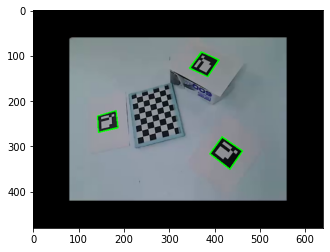

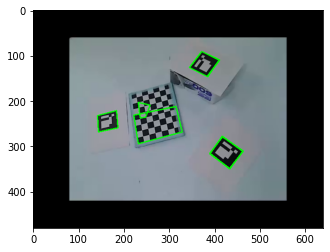

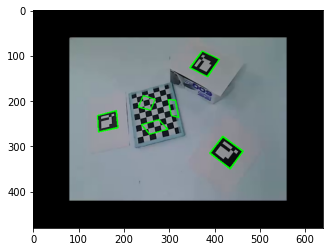

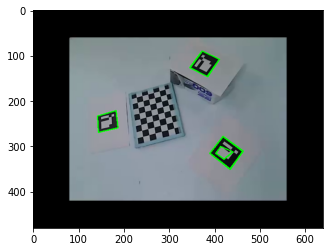

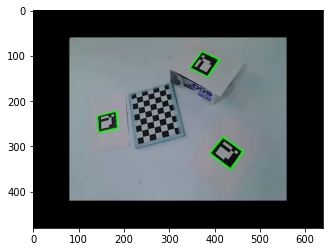

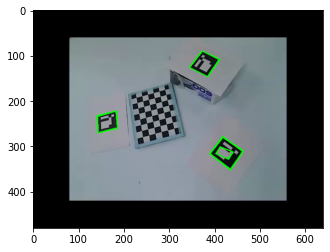

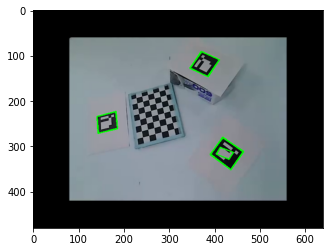

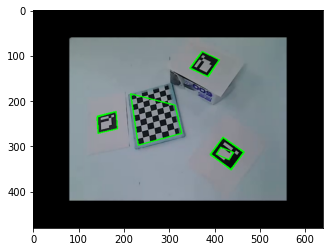

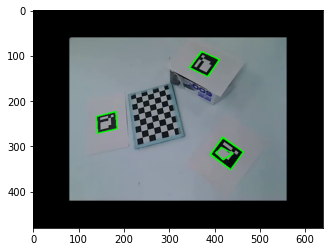

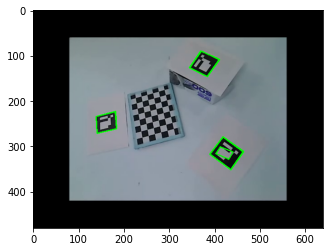

In [48]:
### DEBUG

def create_video(entry):
    codec = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('saida.avi', codec, 29.98, (640, 480))

    while(entry.isOpened()):
        ret, frame = entry.read()
        
        if ret:
            contour, _ = identify_targets(frame)

            out.write(contour)
        else:
            break

    out.release()


video = cv2.VideoCapture("./entrada.mp4", 0)

# create_video(video)

count = 0

while(count < 10):
    ret, frame = video.read()
    
    if ret:
        frame, targets = identify_targets(frame)

        plt.imshow(frame, cmap='gray')
        plt.show()
        
        count += 1
    else:
        break

video.release()
cv2.destroyAllWindows()

In [7]:
 def initOpenGL(intrinsic_params, dimensions):
    (width, height) = dimensions
    
    glClearColor(0.0, 0.0, 0.0, 0.0)
    glClearDepth(1.0)

    glEnable(GL_DEPTH_TEST)

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    
    fx = intrinsic_params[0,0];
    fy = intrinsic_params[1,1];
    
    fovy = 2 * arctan(0.5 * height/fy) * 180/pi;
    aspect = (width * fy)/(height * fx);
    near = 0.1;
    far = 100.0;
    
    gluPerspective(fovy, aspect, near, far);
    
def create_frame(frame, dimensions):
    width = dimensions[0]
    height = dimensions[1]
    
    glEnable(GL_TEXTURE_2D)
    glBindTexture(GL_TEXTURE_2D, glGenTextures(1))
    
    glTexImage2D(GL_TEXTURE_2D, 0, GL_RGBA, width, height, 0, GL_RGBA, GL_UNSIGNED_BYTE, frame)
    
    glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_MIN_FILTER, GL_NEAREST)
    
    glMatrixMode(GL_MODELVIEW);
    
    glBegin(GL_QUADS)
    glTexCoord2f(0, 0); glVertex3f(0, 0, 0)
    glTexCoord2f(1, 0); glVertex3f(width, 0, 0)
    glTexCoord2f(1, 1); glVertex3f(width, height, 0)
    glTexCoord2f(0, 1); glVertex3f(0, height, 0)
    glEnd()
        
# def object3D(obj):
#     # translada o objeto para ficar 10 unidades distante da camera (para podermos ver o objeto)
#     glTranslate(0,0,-10)

#     # move o model em y para centralizar ele
#     glTranslate(0,-2,0)
#     # rotaciona o modelo para podermos ve-lo de frente
#     #glRotate(90,1,0,0)
#     glRotate(180,0,1,0)
#     # renderiza o modelo do Pikachu
#     glCallList(obj.gl_list)

#     # renderiza um cubo
#     # glutWireCube(2.0)

    
def displayCallback():
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()
    
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    
    glEnable(GL_TEXTURE_2D)

    ret, frame = video.read()
    
    if ret:
        create_frame(frame, (640, 480))
                
#         glutSwapBuffers()
        
#         obj = OBJ("Pikachu.obj", swapyz=True)
#         object3D(obj)
        
    

def idleCallback():
    glutPostRedisplay()

In [8]:
dimensions = (640, 480)

intrinsic_params = np.array(([412.529325914068, 0, 315.182970634010],
                     [0, 409.199483018995, 225.068598819594],
                     [0, 0, 1]))

video = cv2.VideoCapture("./entrada.mp4")

glutInit()
glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE)
glutSetOption(GLUT_ACTION_ON_WINDOW_CLOSE, GLUT_ACTION_CONTINUE_EXECUTION)

glutInitWindowSize(*dimensions)

window = glutCreateWindow(b'TP2 - Realidade Aumentada - Vinicius Silva Gomes')
initOpenGL(intrinsic_params, dimensions)

glutDisplayFunc(displayCallback)
glutIdleFunc(idleCallback)

glutMainLoop()

video.release()

NameError: name 'arctan' is not defined